In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
# url kết quả hoạt động kinh doanh(2020-2024)
url = "https://s.cafef.vn/bao-cao-tai-chinh-ngan-hang/bid/incsta/2024/0/0/0/ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"
# url cân đối kế toán (4 năm)
url = "https://s.cafef.vn/bao-cao-tai-chinh-ngan-hang/bid/bsheet/2023/0/0/0/ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"
# url lưu chuyển tiền tệ trực tiếp 
url = "https://s.cafef.vn/bao-cao-tai-chinh-ngan-hang/bid/cashflowdirect/2024/0/0/0/ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"

# url kết quả hoạt động kinh doanh ( 4 quý gần nhất)
url = "https://s.cafef.vn/bao-cao-tai-chinh-ngan-hang/bid/incsta/2025/4/0/0/ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"
# url cân đối kế toán ( 4 quý gần nhất)
url = "https://s.cafef.vn/bao-cao-tai-chinh-ngan-hang/bid/bsheet/2024/2/-5/0/ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"
# url lưu chuyển tiền tệ trực tiếp 
url = "https://s.cafef.vn/bao-cao-tai-chinh-ngan-hang/bid/cashflowdirect/2025/4/0/0/ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"

In [3]:
url = f"https://s.cafef.vn/bao-cao-tai-chinh-ngan-hang/bid/bsheet/2024/2/-5/0/ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"
response = requests.get(url)

In [4]:
response.content 

b'\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">\r\n<head id="Head1"><title>\r\n\tBID: Ng\xc3\xa2n h\xc3\xa0ng TMCP \xc4\x90\xe1\xba\xa7u t\xc6\xb0 v\xc3\xa0 Ph\xc3\xa1t tri\xe1\xbb\x83n Vi\xe1\xbb\x87t Nam - BIDV (HOSE)\r\n</title><meta id="KEYWORDS" name="Keywords" content="B\xc3\xa1o c\xc3\xa1o t\xc3\xa0i ch\xc3\xadnh chi ti\xe1\xba\xbft, Ng\xc3\xa2n h\xc3\xa0ng Th\xc6\xb0\xc6\xa1ng m\xe1\xba\xa1i c\xe1\xbb\x95 ph\xe1\xba\xa7n \xc4\x90\xe1\xba\xa7u t\xc6\xb0 v\xc3\xa0 Ph\xc3\xa1t tri\xe1\xbb\x83n Vi\xe1\xbb\x87t Nam - BID, l\xe1\xbb\xa3i nhu\xe1\xba\xadn r\xc3\xb2ng, l\xe1\xbb\xa3i nhu\xe1\xba\xadn g\xe1\xbb\x99p, D\xc3\xb2ng ti\xe1\xbb\x81n kinh doanh, D\xc3\xb2ng ti\xe1\xbb\x81n \xc4\x91\xe1\xba\xa7u t\xc6\xb0, D\xc3\xb2ng ti\xe1\xbb\x81n t\xc3\xa0i ch\xc3\xadnh" /><meta http-equiv="C

In [5]:
if response.status_code == 200: 
    soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
content_table = soup.find('table', id="tableContent")

In [7]:
# extract the rows of the tables
content_rows = content_table.find_all('tr')

In [8]:
header_table = soup.find("table", id="tblGridData")

In [9]:
header_rows = header_table.find_all("tr")

In [10]:
header = ["chỉ tiêu"]

In [11]:
header_cols = header_rows[0].find_all("td")

In [12]:
for header_col in header_cols:
    if "h_t" in header_col.get("class"):
        header.append(header_col.text.strip())

In [13]:
header

['chỉ tiêu', 'Quý  2-2023', 'Quý  3-2023', 'Quý  1-2024', 'Quý  2-2024']

In [14]:
contents = []

for content_row in content_rows:
    content_cols = content_row.find_all("td")
    content_vals = []
    if len(content_cols) < 4:
        continue
    for content_col_id in range(5):
        content_vals.append(content_cols[content_col_id].text.strip())
    is_filter = False
    for content_val in content_vals:
        if content_val == "":
            is_filter=True
            break
    if not is_filter:
        contents.append(content_vals)
        import pandas as pd
df = pd.DataFrame(contents, columns=header)

In [15]:
contents

[['I.Tiền mặt, vàng bạc, đá quý',
  '11,488,667,000,000',
  '10,731,001,000,000',
  '10,421,506,000,000',
  '10,282,845,000,000'],
 ['II.Tiền gửi tại Ngân hàng Nhà nước',
  '47,536,512,000,000',
  '42,654,276,000,000',
  '36,833,913,000,000',
  '52,441,064,000,000'],
 ['III. Tiền gửi và cho vay các tổ chức tín dụng khác',
  '199,683,000,000,000',
  '194,288,953,000,000',
  '231,693,608,000,000',
  '266,799,524,000,000'],
 ['1.Tiền gửi tại các tổ chức tín dụng khác',
  '186,326,791,000,000',
  '178,524,343,000,000',
  '220,778,564,000,000',
  '256,347,414,000,000'],
 ['2.Cho vay các tổ chức tín dụng khác',
  '13,439,406,000,000',
  '15,849,835,000,000',
  '10,998,123,000,000',
  '10,544,382,000,000'],
 ['3.Dự phòng rủi ro cho vay các tổ chức tín dụng khác',
  '-83,197,000,000',
  '-85,225,000,000',
  '-83,079,000,000',
  '-92,272,000,000'],
 ['IV.Chứng khoán kinh doanh',
  '3,448,599,000,000',
  '5,577,810,000,000',
  '6,972,570,000,000',
  '8,185,847,000,000'],
 ['1.Chứng khoán kinh do

In [16]:
import pandas as pd
df = pd.DataFrame(contents, columns=header)

In [17]:
# df.to_csv("dataset/cdkt_quý.csv",index=False)

In [18]:
df1 = pd.read_csv("dataset\kqhdkd_năm.csv")
df2 = pd.read_csv("dataset\cdkt_năm.csv")
df3 = pd.read_csv("dataset\lctttt_năm.csv")
df4 = pd.read_csv("dataset\kqhdkd_quý.csv")
df5 = pd.read_csv("dataset\cdkt_quý.csv")
df6 = pd.read_csv("dataset\lctttt_quý.csv")


In [19]:
# kế hợp hai data frane năm và quý  
# df1.columns = ['chỉ tiêu', 'Quý 2-2023', 'Quý 3-2023', 'Quý 1-2024', 'Quý 2-2024']
# df4.columns = ['chỉ tiêu', '2020', '2021', '2022', '2023']
merged_df = pd.merge(df3, df6[['chỉ tiêu','Quý  1-2024', 'Quý  2-2024' ]], on = 'chỉ tiêu', how= 'left')

In [20]:
# lưu dataframe kết hợp vào tệp csv mới
merged_df.to_csv("dataset\lctttt.csv", index=False)

In [21]:
df = pd.DataFrame(merged_df)

In [22]:
df14 = pd.read_csv("dataset\kqhdkd.csv")
df25 = pd.read_csv("dataset\cdkt.csv")
df36 = pd.read_csv("dataset\lctttt.csv")

CLEAN 

Shape? 

In [23]:
df.shape

(31, 7)

Cols? 

In [24]:
df.columns

Index(['chỉ tiêu', '2020', '2021', '2022', '2023', 'Quý  1-2024',
       'Quý  2-2024'],
      dtype='object')

Stats

In [25]:
df.describe()

,chỉ tiêu,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024
count,31,31,31,31,31,27,27
unique,31,30,30,31,30,27,27
top,1. Thu nhập lãi và các khoản thu nhập tương tự...,"-2,669,096,000,000","-1,353,760,000,000","120,347,258,000,000","-119,694,000,000","33,049,473,000,000","65,928,181,000,000"
freq,1,2,2,1,2,1,1


dtypes?

In [26]:
df.dtypes

chỉ tiêu       object
2020           object
2021           object
2022           object
2023           object
Quý  1-2024    object
Quý  2-2024    object
dtype: object

In [27]:
df.head()

,chỉ tiêu,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024
0,1. Thu nhập lãi và các khoản thu nhập tương tự...,"102,790,502,000,000","103,175,768,000,000","120,347,258,000,000","149,297,819,000,000","33,049,473,000,000","65,928,181,000,000"
1,9. (Tăng)/Giảm các khoản tiền gửi và cho vay c...,"-14,905,662,000,000","-3,809,544,000,000","3,512,237,000,000","-1,064,184,000,000","-329,447,000,000","-1,584,638,000,000"
2,10. (Tăng)/Giảm các khoản về kinh doanh chứng ...,"13,505,590,000,000","-47,840,246,000,000","-55,646,978,000,000","8,284,842,000,000","2,091,837,000,000","-30,964,835,000,000"
3,11. (Tăng)/Giảm các công cụ tài chính phái sin...,"-75,803,000,000","-24,349,000,000","-845,932,000,000","1,038,214,000,000",NaN,NaN
4,12. (Tăng)/Giảm các khoản cho vay khách hàng,"-97,297,933,000,000","-140,336,727,000,000","-167,589,073,000,000","-255,443,174,000,000","-16,265,349,000,000","-105,150,518,000,000"


In [28]:
# convert string to float
df1['2020'] = df1['2020'].str.replace(",","").astype(float)
df1['2021'] = df1['2021'].str.replace(",","").astype(float)
df1['2022'] = df1['2022'].str.replace(",","").astype(float)
df1['2023'] = df1['2023'].str.replace(",","").astype(float)

In [29]:
df2['2020'] = df2['2020'].str.replace(",","").astype(float)
df2['2021'] = df2['2021'].str.replace(",","").astype(float)
df2['2022'] = df2['2022'].str.replace(",","").astype(float)
df2['2023'] = df2['2023'].str.replace(",","").astype(float)

In [30]:
df3['2020'] = df3['2020'].str.replace(",","").astype(float)
df3['2021'] = df3['2021'].str.replace(",","").astype(float)
df3['2022'] = df3['2022'].str.replace(",","").astype(float)
df3['2023'] = df3['2023'].str.replace(",","").astype(float)

In [31]:
df14['2020'] = df14['2020'].str.replace(",","").astype(float)
df14['2021'] = df14['2021'].str.replace(",","").astype(float)
df14['2022'] = df14['2022'].str.replace(",","").astype(float)
df14['2023'] = df14['2023'].str.replace(",","").astype(float)
df14['Quý  1-2024'] = df14['Quý  1-2024'].str.replace(",","").astype(float)
df14['Quý  2-2024'] = df14['Quý  2-2024'].str.replace(",","").astype(float)

In [32]:
df25['2020'] = df25['2020'].str.replace(",","").astype(float)
df25['2021'] = df25['2021'].str.replace(",","").astype(float)
df25['2022'] = df25['2022'].str.replace(",","").astype(float)
df25['2023'] = df25['2023'].str.replace(",","").astype(float)
df25['Quý  1-2024'] = df25['Quý  1-2024'].str.replace(",","").astype(float)
df25['Quý  2-2024'] = df25['Quý  2-2024'].str.replace(",","").astype(float)

In [33]:
df36['2020'] = df36['2020'].str.replace(",","").astype(float)
df36['2021'] = df36['2021'].str.replace(",","").astype(float)
df36['2022'] = df36['2022'].str.replace(",","").astype(float)
df36['2023'] = df36['2023'].str.replace(",","").astype(float)
df36['Quý  1-2024'] = df36['Quý  1-2024'].str.replace(",","").astype(float)
df36['Quý  2-2024'] = df36['Quý  2-2024'].str.replace(",","").astype(float)

phân tích báo cáo tài chính 

hiệu quả kinh doanh 

biên lãi ròng

In [34]:
# lấy dữ liệu từ cân đối kế toán 
df25 

,chỉ tiêu,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024
0,"I.Tiền mặt, vàng bạc, đá quý",1.229419e+13,1.266058e+13,1.374523e+13,1.102920e+13,1.042151e+13,1.028284e+13
1,II.Tiền gửi tại Ngân hàng Nhà nước,4.943214e+13,6.885144e+13,1.114184e+14,5.161566e+13,3.683391e+13,5.244106e+13
2,III. Tiền gửi và cho vay các tổ chức tín dụng ...,8.534786e+13,1.359402e+14,2.211778e+14,2.118085e+14,2.316936e+14,2.667995e+14
3,1.Tiền gửi tại các tổ chức tín dụng khác,6.219123e+13,1.120430e+14,2.034669e+14,1.973294e+14,2.207786e+14,2.563474e+14
4,2.Cho vay các tổ chức tín dụng khác,2.329546e+13,2.402658e+13,1.779587e+13,1.456428e+13,1.099812e+13,1.054438e+13
5,3.Dự phòng rủi ro cho vay các tổ chức tín dụng...,-1.388260e+11,-1.293340e+11,-8.499400e+10,-8.521000e+10,-8.307900e+10,-9.227200e+10
6,IV.Chứng khoán kinh doanh,1.016971e+13,6.068913e+12,1.701464e+12,6.972474e+12,6.972570e+12,8.185847e+12
7,1.Chứng khoán kinh doanh,1.018444e+13,6.083165e+12,1.748521e+12,7.003656e+12,7.003036e+12,8.224631e+12
8,2.Dự phòng giảm giá chứng khoán kinh doanh,-1.472500e+10,-1.425200e+10,-4.705700e+10,-3.118200e+10,-3.046600e+10,-3.878400e+10
9,VI.Cho vay khách hàng,1.195240e+15,1.325529e+15,1.483996e+15,1.737245e+15,1.752683e+15,1.844886e+15


In [35]:
# lấy dữ liệu kết quả hoạt động kinh doanh 
df14

,chỉ tiêu,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024
0,1.Thu nhập lãi và các khoản thu nhập tương tự,1.006875e+14,1.010079e+14,1.211107e+14,1.527613e+14,3.359598e+13,3.389690e+13
1,5. Thu nhập từ hoạt động khác,7.992789e+12,8.957444e+12,6.526421e+12,6.542525e+12,1.148615e+12,2.045921e+12
2,6. Chi phí hoạt động khác,2.900221e+12,2.778592e+12,2.316094e+12,4.474726e+12,6.482990e+11,1.014475e+12
3,VI. Lãi/lỗ thuần từ hoạt động khác,5.092568e+12,6.178852e+12,4.210327e+12,2.067799e+12,5.003160e+11,1.031446e+12
4,"VII. Thu nhập từ góp vốn, mua cổ phần",1.542670e+11,1.876220e+11,2.909520e+11,3.552750e+11,9.564400e+10,9.942300e+10
5,IX. Lợi nhuận thuần từ hoạt động kinh doanh tr...,3.234418e+13,4.302857e+13,4.702497e+13,4.793242e+13,1.177863e+13,1.351673e+13
6,X. Chi phí dự phòng rủi ro tín dụng,2.331794e+13,2.948092e+13,2.401548e+13,2.034352e+13,4.388714e+12,5.357739e+12
7,XI. Tổng lợi nhuận trước thuế,9.026243e+12,1.354765e+13,2.300948e+13,2.758890e+13,7.389914e+12,8.158994e+12
8,7. Chi phí thuế TNDN hiện hành,1.799378e+12,2.707403e+12,4.604520e+12,5.615711e+12,1.474084e+12,1.628054e+12
9,8. Chi phí thuế TNDN hoãn lại,3.300000e+09,-1.023000e+09,-1.504900e+10,-3.948000e+09,2.510000e+08,-3.056000e+09


In [36]:
# thu nhập lãi thuần từ năm 2020 đến quý 2 năm 2024 dữ liệu từ kết quả hoạt động kinh doanh 
inc = df14.iloc[[14]]
inc

,chỉ tiêu,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024
14,I. Thu nhập lãi thuần,3.579680e+13,4.682331e+13,5.606968e+13,5.613557e+13,1.354136e+13,1.483777e+13


In [37]:
# tài sản sinh lãi 
res = df25.iloc[[1,2,6,9,12]].sum(axis=0)
res['chỉ tiêu'] = "tài sản sinh lãi"
res 


chỉ tiêu         tài sản sinh lãi
2020           1465304643000000.0
2021           1713478306000000.0
2022           2053929982000000.0
2023           2230034373000000.0
Quý  1-2024    2248397831000000.0
Quý  2-2024    2424533167000000.0
dtype: object

In [38]:
res.index

Index(['chỉ tiêu', '2020', '2021', '2022', '2023', 'Quý  1-2024',
       'Quý  2-2024'],
      dtype='object')

In [39]:
# tài sản sinh lãi bình quân = (tài sản sinh lãi hiện tại+tài sản sinh lãi quá khứ)/2
avg_cols = ['2021','2022','2023','Quý  1-2024', 'Quý  2-2024']
avg = res[avg_cols].copy()
temp_cols = ['2020', '2021','2022','2023','Quý  1-2024']
temp = res[temp_cols].copy()
temp = temp.set_axis(avg_cols)
avg = (avg + temp) / 2
avg["chỉ tiêu"] = "tài sản sinh lãi bình quân"
avg



2021                   1589391474500000.0
2022                   1883704144000000.0
2023                   2141982177500000.0
Quý  1-2024            2239216102000000.0
Quý  2-2024            2336465499000000.0
chỉ tiêu       tài sản sinh lãi bình quân
dtype: object

In [40]:
# tính Nim từ năm 2021 đến quý 2-2024 NIM = thu nhập lãi thuần/ tài sản sinh lời bình quân
nim = inc.copy()
nim_cols = list(set(nim.columns)-set(["chỉ tiêu","2020"]))
nim[nim_cols] = (inc[nim_cols]/avg[nim_cols])*100
nim["Quý  1-2024"] = nim["Quý  1-2024"]*4
nim["Quý  2-2024"] = nim["Quý  2-2024"]*4
nim["chỉ tiêu"] = "nim"
nim = nim[["2021","2022","2023","Quý  1-2024", "Quý  2-2024"]]
nim

,2021,2022,2023,Quý 1-2024,Quý 2-2024
14,2.94599,2.976565,2.62073,2.418947,2.540208


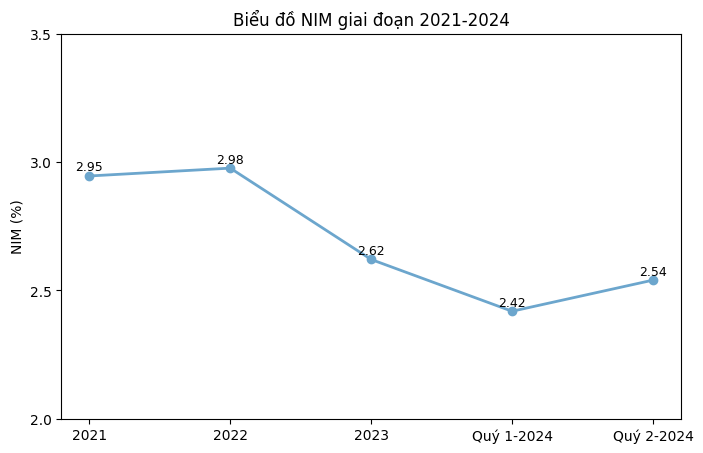

In [41]:
# visulize NIM 
import matplotlib.pyplot as plt 

years = ['2021', '2022', '2023', 'Quý 1-2024', 'Quý 2-2024']
nim_values = [2.94599, 2.976565, 2.62073, 2.418947, 2.540208]

df_nim = pd.DataFrame({'Year': years, 'NIM': nim_values})

# Vẽ biểu đồ đường (line chart)
plt.figure(figsize=(8, 5))
plt.plot(df_nim['Year'], df_nim['NIM'], marker='o', linestyle='-', color='#6CA6CD', linewidth=2)

# Thêm số liệu lên biểu đồ
for i in range(len(df_nim)):
    plt.text(df_nim['Year'][i], df_nim['NIM'][i] + 0.02, f'{df_nim["NIM"][i]:.2f}', ha='center', fontsize=9)

# Định dạng biểu đồ
plt.ylim(2.0, 3.5)
plt.yticks([2.0, 2.5, 3.0, 3.5])
plt.ylabel('NIM (%)')
plt.title('Biểu đồ NIM giai đoạn 2021-2024')

# Hiển thị biểu đồ
plt.show()

tăng trưởng thu nhập lãi thuần và lãi từ hoạt động dịch vụ 

In [42]:
df1

,chỉ tiêu,2020,2021,2022,2023
0,1.Thu nhập lãi và các khoản thu nhập tương tự,1.006875e+14,1.010079e+14,1.211107e+14,1.527613e+14
1,5. Thu nhập từ hoạt động khác,7.992789e+12,8.957444e+12,6.526421e+12,6.542525e+12
2,6. Chi phí hoạt động khác,2.900221e+12,2.778592e+12,2.316094e+12,4.474726e+12
3,VI. Lãi/lỗ thuần từ hoạt động khác,5.092568e+12,6.178852e+12,4.210327e+12,2.067799e+12
4,"VII. Thu nhập từ góp vốn, mua cổ phần",1.542670e+11,1.876220e+11,2.909520e+11,3.552750e+11
5,IX. Lợi nhuận thuần từ hoạt động kinh doanh tr...,3.234418e+13,4.302857e+13,4.702497e+13,4.793242e+13
6,X. Chi phí dự phòng rủi ro tín dụng,2.331794e+13,2.948092e+13,2.401548e+13,2.034352e+13
7,XI. Tổng lợi nhuận trước thuế,9.026243e+12,1.354765e+13,2.300948e+13,2.758890e+13
8,7. Chi phí thuế TNDN hiện hành,1.799378e+12,2.707403e+12,4.604520e+12,5.615711e+12
9,8. Chi phí thuế TNDN hoãn lại,3.300000e+09,-1.023000e+09,-1.504900e+10,-3.948000e+09


In [43]:
# lấy dữ liệu thu nhập lãi thuần 
pf = df1.iloc[14]
pf

chỉ tiêu    I. Thu nhập lãi thuần
2020             35796799000000.0
2021             46823308000000.0
2022             56069684000000.0
2023             56135566000000.0
Name: 14, dtype: object

In [44]:
# lấy dữ liệu lãi/lỗ thuần từ hoạt động dịch vụ
ps = df1.iloc[17]
ps

chỉ tiêu    II. Lãi/lỗ thuần từ hoạt động dịch vụ
2020                              5266381000000.0
2021                              6614281000000.0
2022                              5648065000000.0
2023                              6569870000000.0
Name: 17, dtype: object

In [45]:
pfs = pd.concat([pf,ps], axis=1).T.reset_index(drop=True)
pfs

,chỉ tiêu,2020,2021,2022,2023
0,I. Thu nhập lãi thuần,35796799000000.0,46823308000000.0,56069684000000.0,56135566000000.0
1,II. Lãi/lỗ thuần từ hoạt động dịch vụ,5266381000000.0,6614281000000.0,5648065000000.0,6569870000000.0


In [46]:
# tăng trưởng lãi thuần = [(lãi thuần kỳ này - lãi thuần kỳ trước)/lãi thuần kì trước]*100%
yoy_cols = ['2021', '2022', '2023']
yoy = pf[yoy_cols].copy()
temp_cols = ['2020', '2021', '2022']
temp = pf[temp_cols].copy()
temp = temp.set_axis(yoy_cols)
yoy = ((yoy - temp)/temp)*100
yoy["chỉ tiêu"] = "Tăng trưởng thu nhập lãi thuần"
yoy

2021                             30.803059
2022                             19.747379
2023                                0.1175
chỉ tiêu    Tăng trưởng thu nhập lãi thuần
Name: 14, dtype: object

In [47]:
# tăng trưởng lãi từ hoạt động dịch vụ 
yoy_cols = ['2021', '2022', '2023']
yoy1 = ps[yoy_cols].copy()
temp_cols = ['2020', '2021', '2022']
temp = ps[temp_cols].copy()
temp = temp.set_axis(yoy_cols)
yoy1 = ((yoy1 - temp)/temp)*100
yoy1["chỉ tiêu"] = "Tăng trưởng lãi/lỗ thuần từ hoạt động dịch vụ"
yoy1

2021                                            25.594426
2022                                           -14.608028
2023                                            16.320722
chỉ tiêu    Tăng trưởng lãi/lỗ thuần từ hoạt động dịch vụ
Name: 17, dtype: object

In [48]:
yoy = pd.concat([yoy, yoy1], axis=1).T.reset_index(drop=True)
yoy

,2021,2022,2023,chỉ tiêu
0,30.803059,19.747379,0.1175,Tăng trưởng thu nhập lãi thuần
1,25.594426,-14.608028,16.320722,Tăng trưởng lãi/lỗ thuần từ hoạt động dịch vụ


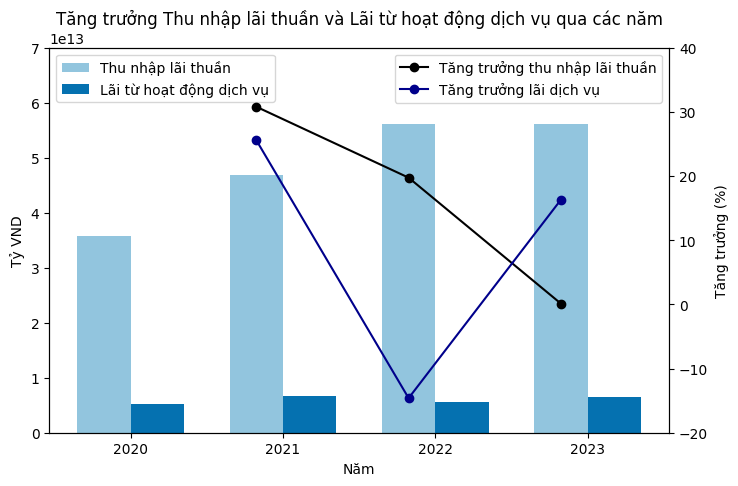

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu cho Bar Chart (Thu nhập lãi thuần và Lãi từ hoạt động dịch vụ)
year_indices = ["2020", "2021", "2022", "2023"]
years = [2020,2021,2022,2023]
income = pfs[pfs["chỉ tiêu"]=="I. Thu nhập lãi thuần"][year_indices].to_numpy()[0]
profit_loss = pfs[pfs["chỉ tiêu"]=="II. Lãi/lỗ thuần từ hoạt động dịch vụ"][year_indices].to_numpy()[0]

# Dữ liệu cho Line Graph (Tăng trưởng thu nhập lãi thuần và Tăng trưởng lãi từ hoạt động dịch vụ)
income_growth_year_indices = ["2021", "2022", "2023"]
income_growth_years = [2021, 2022, 2023]
income_growth = yoy[yoy["chỉ tiêu"]=="Tăng trưởng thu nhập lãi thuần"][income_growth_year_indices].to_numpy()[0]
profit_loss_growth = yoy[yoy["chỉ tiêu"]=="Tăng trưởng lãi/lỗ thuần từ hoạt động dịch vụ"][income_growth_year_indices].to_numpy()[0]

fig, ax1 = plt.subplots(figsize=(8, 5))

# Vẽ Bar Chart trên trục y1
bar_width = 0.35
bar1 = ax1.bar(years, income, bar_width, label='Thu nhập lãi thuần', color='#92c5de')
bar2 = ax1.bar(np.array(years) + bar_width, profit_loss, bar_width, label='Lãi từ hoạt động dịch vụ', color='#0571b0')

# Thiết lập trục y1 (trục bên trái)
ax1.set_xlabel('Năm')
ax1.set_ylabel('Tỷ VND', color='black')
ax1.set_ylim(0, 70000000000000)
ax1.set_xticks(np.array(years) + bar_width / 2)
ax1.set_xticklabels(years)
ax1.tick_params(axis='y', labelcolor='black')

# Tạo trục y2 (trục bên phải)
ax2 = ax1.twinx()
ax2.set_ylabel('Tăng trưởng (%)', color='black')
ax2.set_ylim(-20, 40)
ax2.tick_params(axis='y', labelcolor='black')

# Vẽ Line Graph trên trục y2
line1 = ax2.plot(income_growth_years, income_growth, label='Tăng trưởng thu nhập lãi thuần', color='black', marker='o')
line2 = ax2.plot(income_growth_years, profit_loss_growth, label='Tăng trưởng lãi dịch vụ', color='darkblue', marker='o')

# Hiển thị legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Tăng trưởng thu nhập lãi thuần và Lãi từ hoạt động dịch vụ qua các năm')
plt.show()


Tăng trưởng thu nhập hoạt động và LNST năm 2020 - 2023

In [50]:
df = pd.read_csv("dataset/tình_hình_kinh_tế.csv")
df 

,chỉ tiêu,2020,2021,2022,2023
0,Tổng doanh thu,"117,452,648,000,000","120,523,066,000,000","138,272,273,000,000","171,552,516,000,000"
1,Tổng lợi nhuận trước thuế,"9,026,243,000,000","13,547,651,000,000","23,009,485,000,000","27,588,904,000,000"
2,Tổng chi phí,"71,142,633,000,000","60,719,003,000,000","72,053,245,000,000","131,504,604,000,000"
3,Lợi nhuận ròng,"6,996,622,000,000","10,540,138,000,000","18,158,502,000,000","21,504,918,000,000"
4,Tổng chi phí hoạt động,"17,692,960,000,000","19,465,321,000,000","22,557,474,000,000","25,080,598,000,000"
5,Tổng thu nhập hoạt động,"50,037,144,000,000","62,493,889,000,000","69,582,444,000,000","73,013,017,000,000"


In [51]:
df['2020'] = df['2020'].str.replace(",","").astype(float)
df['2021'] = df['2021'].str.replace(",","").astype(float)
df['2022'] = df['2022'].str.replace(",","").astype(float)
df['2023'] = df['2023'].str.replace(",","").astype(float)

In [52]:
income= df.iloc[5]
income

chỉ tiêu    Tổng thu nhập hoạt động
2020               50037144000000.0
2021               62493889000000.0
2022               69582444000000.0
2023               73013017000000.0
Name: 5, dtype: object

In [53]:
# Tăng trưởng thu nhập hoạt động
TOI_cols = ['2021', '2022', '2023']
TOI = income[TOI_cols].copy()    
temp_cols = ['2020', '2021', '2022']
temp = income[temp_cols].copy()
temp = temp.set_axis(TOI_cols)
TOI = ((TOI - temp)/temp)*100
TOI["chỉ tiêu"] = "tăng trưởng thu nhập hoạt động"
TOI


2021                             24.894996
2022                             11.342797
2023                              4.930228
chỉ tiêu    tăng trưởng thu nhập hoạt động
Name: 5, dtype: object

In [54]:
# Lợi nhuận sau thuế
pat = df1.iloc[11]
pat

chỉ tiêu    XIII. Lợi nhuận sau thuế
2020                 7223565000000.0
2021                10841271000000.0
2022                18420014000000.0
2023                21977141000000.0
Name: 11, dtype: object

In [55]:
# Tăng trưởng lợi nhuận sau thuế
LNST_cols = ['2021', '2022', '2023']
LNST = pat[LNST_cols].copy()    
temp_cols = ['2020', '2021', '2022']
temp = pat[temp_cols].copy()
temp = temp.set_axis(LNST_cols)
LNST = ((LNST - temp)/temp)*100
LNST["chỉ tiêu"] = "tăng trưởng lợi nhuận sau thuế"
LNST

2021                             50.082002
2022                             69.906407
2023                             19.311207
chỉ tiêu    tăng trưởng lợi nhuận sau thuế
Name: 11, dtype: object

In [56]:
In = pd.concat([income,pat], axis=1).T.reset_index(drop=True)
In

,chỉ tiêu,2020,2021,2022,2023
0,Tổng thu nhập hoạt động,50037144000000.0,62493889000000.0,69582444000000.0,73013017000000.0
1,XIII. Lợi nhuận sau thuế,7223565000000.0,10841271000000.0,18420014000000.0,21977141000000.0


In [57]:
growth = pd.concat([TOI, LNST], axis=1).T.reset_index(drop=True)
growth

,2021,2022,2023,chỉ tiêu
0,24.894996,11.342797,4.930228,tăng trưởng thu nhập hoạt động
1,50.082002,69.906407,19.311207,tăng trưởng lợi nhuận sau thuế


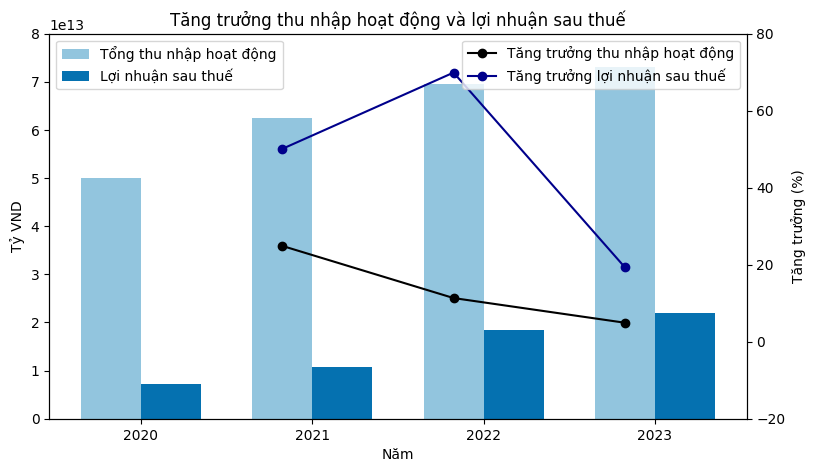

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu cho Bar Chart (Tổng thu nhập hoạt động và lợi nhuận sau thuế)
year_indices = ["2020", "2021", "2022", "2023"]
years = [2020,2021,2022,2023]

total_operating_income = In[In["chỉ tiêu"]=="Tổng thu nhập hoạt động"][year_indices].to_numpy()[0]
NPAT = In[In["chỉ tiêu"]=="XIII. Lợi nhuận sau thuế"][year_indices].to_numpy()[0]

# Dữ liệu cho Line Graph (Tăng trưởng thu nhập hoạt động và lợi nhuận sau thuế)
total_operating_income_growth_year_indices = ["2021", "2022", "2023"]
total_operating_income_growth_years = [2021, 2022, 2023]

total_operating_income_growth = growth[growth["chỉ tiêu"]=="tăng trưởng thu nhập hoạt động"][total_operating_income_growth_year_indices].to_numpy()[0]
NPAT_growth = growth[growth["chỉ tiêu"]=="tăng trưởng lợi nhuận sau thuế"][total_operating_income_growth_year_indices].to_numpy()[0]

fig, ax1 = plt.subplots(figsize=(9,5))

# Vẽ Bar Chart trên trục y1
bar_width = 0.35
bar1 = ax1.bar(years, total_operating_income, bar_width, label='Tổng thu nhập hoạt động', color='#92c5de')
bar2 = ax1.bar(np.array(years) + bar_width, NPAT, bar_width, label='Lợi nhuận sau thuế', color='#0571b0')

# Thiết lập trục y1 (trục bên trái)
ax1.set_xlabel('Năm')
ax1.set_ylabel('Tỷ VND', color='black')
ax1.set_ylim(0, 80000000000000)
ax1.set_xticks(np.array(years) + bar_width / 2)
ax1.set_xticklabels(years)
ax1.tick_params(axis='y', labelcolor='black')

# Tạo trục y2 (trục bên phải)
ax2 = ax1.twinx()
ax2.set_ylabel('Tăng trưởng (%)', color='black')
ax2.set_ylim(-20, 80)
ax2.tick_params(axis='y', labelcolor='black')

# Vẽ Line Graph trên trục y2
line1 = ax2.plot(total_operating_income_growth_years, total_operating_income_growth, label='Tăng trưởng thu nhập hoạt động', color='black', marker='o')
line2 = ax2.plot(total_operating_income_growth_years, NPAT_growth, label='Tăng trưởng lợi nhuận sau thuế', color='darkblue', marker='o')

# Hiển thị legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Tăng trưởng thu nhập hoạt động và lợi nhuận sau thuế')
plt.show()


Cơ cấu thu nhập ngoài lãi( dịch vụ, ngoại hối, chứng khoán, khác)

In [59]:
df14

,chỉ tiêu,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024
0,1.Thu nhập lãi và các khoản thu nhập tương tự,1.006875e+14,1.010079e+14,1.211107e+14,1.527613e+14,3.359598e+13,3.389690e+13
1,5. Thu nhập từ hoạt động khác,7.992789e+12,8.957444e+12,6.526421e+12,6.542525e+12,1.148615e+12,2.045921e+12
2,6. Chi phí hoạt động khác,2.900221e+12,2.778592e+12,2.316094e+12,4.474726e+12,6.482990e+11,1.014475e+12
3,VI. Lãi/lỗ thuần từ hoạt động khác,5.092568e+12,6.178852e+12,4.210327e+12,2.067799e+12,5.003160e+11,1.031446e+12
4,"VII. Thu nhập từ góp vốn, mua cổ phần",1.542670e+11,1.876220e+11,2.909520e+11,3.552750e+11,9.564400e+10,9.942300e+10
5,IX. Lợi nhuận thuần từ hoạt động kinh doanh tr...,3.234418e+13,4.302857e+13,4.702497e+13,4.793242e+13,1.177863e+13,1.351673e+13
6,X. Chi phí dự phòng rủi ro tín dụng,2.331794e+13,2.948092e+13,2.401548e+13,2.034352e+13,4.388714e+12,5.357739e+12
7,XI. Tổng lợi nhuận trước thuế,9.026243e+12,1.354765e+13,2.300948e+13,2.758890e+13,7.389914e+12,8.158994e+12
8,7. Chi phí thuế TNDN hiện hành,1.799378e+12,2.707403e+12,4.604520e+12,5.615711e+12,1.474084e+12,1.628054e+12
9,8. Chi phí thuế TNDN hoãn lại,3.300000e+09,-1.023000e+09,-1.504900e+10,-3.948000e+09,2.510000e+08,-3.056000e+09


In [60]:
NISS= df14.tail(4).reset_index(drop=True)
NISS

,chỉ tiêu,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024
0,II. Lãi/lỗ thuần từ hoạt động dịch vụ,5.266381e+12,6.614281e+12,5.648065e+12,6.569870e+12,1.693013e+12,1.939044e+12
1,III. Lãi/lỗ thuần từ hoạt động kinh doanh ngoạ...,1.732324e+12,1.896154e+12,3.136613e+12,4.707371e+12,1.465144e+12,1.725940e+12
2,IV. Lãi /lỗ thuần từ mua bán chứng khoán kinh ...,4.786680e+11,5.862410e+11,-3.166400e+10,3.053960e+11,1.668490e+11,7.874500e+10
3,V. Lãi/lỗ thuần từ mua bán chứng khoán đầu tư,1.516137e+12,2.074310e+11,2.584670e+11,2.871740e+12,-2.910920e+11,5.125280e+11


In [61]:
SUM = df14.iloc[[17,18,19,20]].sum(axis=0)
SUM['chỉ tiêu'] = "tổng dịch vụ, ngoại hối, chứng khoán"
SUM

chỉ tiêu       tổng dịch vụ, ngoại hối, chứng khoán
2020                                8993510000000.0
2021                                9304107000000.0
2022                                9011481000000.0
2023                               14454377000000.0
Quý  1-2024                         3033914000000.0
Quý  2-2024                         4256257000000.0
dtype: object

In [62]:
# thu nhập ngoài lãi = tổng thu nhập hoạt động- thu nhập lãi thuần 
TNLT = df14.iloc[14]
TNLT


chỉ tiêu       I. Thu nhập lãi thuần
2020                35796799000000.0
2021                46823308000000.0
2022                56069684000000.0
2023                56135566000000.0
Quý  1-2024         13541360000000.0
Quý  2-2024         14837771000000.0
Name: 14, dtype: object

In [63]:
income

chỉ tiêu    Tổng thu nhập hoạt động
2020               50037144000000.0
2021               62493889000000.0
2022               69582444000000.0
2023               73013017000000.0
Name: 5, dtype: object

In [64]:
In = pd.DataFrame(income).T.reset_index(drop=True)
In

,chỉ tiêu,2020,2021,2022,2023
0,Tổng thu nhập hoạt động,50037144000000.0,62493889000000.0,69582444000000.0,73013017000000.0


In [65]:
# nguồn cafef
# df2 = pd.DataFrame({'chỉ tiêu': ['Quý  1-2024','Quý  2-2024'],
#                     'Tổng thu nhập hoạt động': [17171234000000, 20224897000000]})
df2 = pd.DataFrame({'chỉ tiêu': ["Tổng thu nhập hoạt động"],
                    'Quý  1-2024': [17171234000000],
                    'Quý  2-2024':[20224897000000]})
df2


,chỉ tiêu,Quý 1-2024,Quý 2-2024
0,Tổng thu nhập hoạt động,17171234000000,20224897000000


In [66]:
# tổng thu nhập hoạt động
In = pd.merge(In, df2, on='chỉ tiêu', how='outer')
inc = In.iloc[0]
inc

chỉ tiêu       Tổng thu nhập hoạt động
2020                  50037144000000.0
2021                  62493889000000.0
2022                  69582444000000.0
2023                  73013017000000.0
Quý  1-2024             17171234000000
Quý  2-2024             20224897000000
Name: 0, dtype: object

In [67]:
# thu nhập ngoài lãi = tổng thu nhập hoạt đông - thu nhập lãi thuần (NII- thu nhập ngoài lãi)
# "cơ cấu lãi lỗ từ hoạt động dịch vụ", "cơ cấu lãi lỗ từ hoạt động kinh doanh ngoại hối", "cơ cấu lãi lỗ từ mua bán chứng khoán kinh doanh", "cơ cấu lãi lỗ từ mua bán chứng khoán đầu tư"
# NII = inc - TNLT
X_cols = ['2020','2021','2022','2023','Quý  1-2024','Quý  2-2024']
NII = inc[X_cols].copy()
Y_cols = ['2020','2021','2022','2023','Quý  1-2024','Quý  2-2024']
Y = TNLT[Y_cols].copy()
Y = Y.set_axis(Y_cols)
NII = (NII-Y)
NII["chỉ tiêu"] = "Thu nhập ngoài lãi"
NII

2020             14240345000000.0
2021             15670581000000.0
2022             13512760000000.0
2023             16877451000000.0
Quý  1-2024       3629874000000.0
Quý  2-2024       5387126000000.0
chỉ tiêu       Thu nhập ngoài lãi
dtype: object

In [68]:
A_cols = ['2020','2021','2022','2023','Quý  1-2024','Quý  2-2024']
DIF = NII[X_cols].copy()
B_cols = ['2020','2021','2022','2023','Quý  1-2024','Quý  2-2024']
B = SUM[B_cols].copy()
B = B.set_axis(B_cols)
DIF = (DIF-SUM)
DIF["chỉ tiêu"] = "Thu nhập ngoài lãi khác"
DIF

2020                   5246835000000.0
2021                   6366474000000.0
2022                   4501279000000.0
2023                   2423074000000.0
Quý  1-2024             595960000000.0
Quý  2-2024            1130869000000.0
chỉ tiêu       Thu nhập ngoài lãi khác
dtype: object

In [69]:
DF = pd.DataFrame(DIF)
DF

,0
2020,5246835000000.0
2021,6366474000000.0
2022,4501279000000.0
2023,2423074000000.0
Quý 1-2024,595960000000.0
Quý 2-2024,1130869000000.0
chỉ tiêu,Thu nhập ngoài lãi khác


In [70]:
# tính có cấu thu nhập ngoài lãi
NIS_cols = ['2020','2021','2022','2023','Quý  1-2024','Quý  2-2024']
NIIS = NISS[NIS_cols].copy()
NI_cols = ['2020','2021','2022','2023','Quý  1-2024','Quý  2-2024']
NI = NII[NI_cols].copy()
NI = NI.set_axis(NIS_cols)
NIIS = (NIIS/NI)*100
NIIS["chỉ tiêu"] = " dịch vụ", " ngoại hối", " mua bán chứng khoán kinh doanh", " mua bán chứng khoán đầu tư"
NIIS


,2020,2021,2022,2023,Quý 1-2024,Quý 2-2024,chỉ tiêu
0,36.982117,42.208269,41.798012,38.926909,46.641096,35.994035,dịch vụ
1,12.164902,12.100087,23.212231,27.891481,40.363495,32.038233,ngoại hối
2,3.361351,3.741029,-0.234327,1.809491,4.596551,1.461726,mua bán chứng khoán kinh doanh
3,10.646772,1.323697,1.912762,17.015247,-8.019342,9.513941,mua bán chứng khoán đầu tư


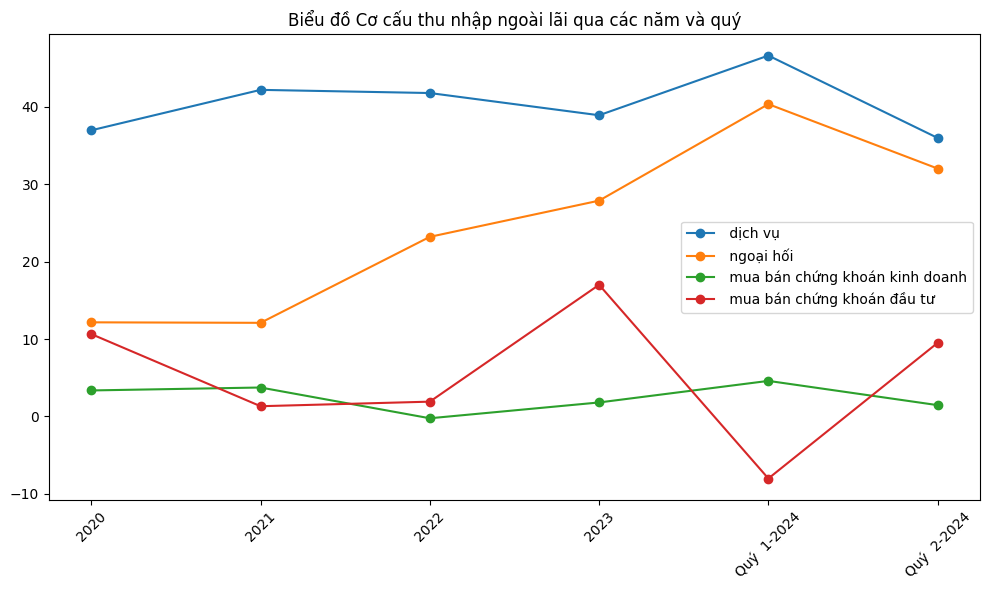

In [71]:
# visulize cơ cấu thu nhập ngoài lãi 2019-2024
df = pd.DataFrame(NIIS)

df.set_index('chỉ tiêu', inplace=True)

# vẽ biểu đồ
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    plt.plot(df.columns, row, marker='o', label=index)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Cơ cấu thu nhập ngoài lãi qua các năm và quý')
plt.xticks(rotation=45)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Tỷ lệ CIR của BID 

In [72]:
# cost to income Ratio(tỷ lệ CIR = chi phí hoạt động / thu nhập hoạt động)
df = pd.read_csv("dataset/tình_hình_kinh_tế.csv")
df

,chỉ tiêu,2020,2021,2022,2023
0,Tổng doanh thu,"117,452,648,000,000","120,523,066,000,000","138,272,273,000,000","171,552,516,000,000"
1,Tổng lợi nhuận trước thuế,"9,026,243,000,000","13,547,651,000,000","23,009,485,000,000","27,588,904,000,000"
2,Tổng chi phí,"71,142,633,000,000","60,719,003,000,000","72,053,245,000,000","131,504,604,000,000"
3,Lợi nhuận ròng,"6,996,622,000,000","10,540,138,000,000","18,158,502,000,000","21,504,918,000,000"
4,Tổng chi phí hoạt động,"17,692,960,000,000","19,465,321,000,000","22,557,474,000,000","25,080,598,000,000"
5,Tổng thu nhập hoạt động,"50,037,144,000,000","62,493,889,000,000","69,582,444,000,000","73,013,017,000,000"


In [73]:
df['2020'] = df['2020'].str.replace(",","").astype(float)
df['2021'] = df['2021'].str.replace(",","").astype(float)
df['2022'] = df['2022'].str.replace(",","").astype(float)
df['2023'] = df['2023'].str.replace(",","").astype(float)

In [74]:
# tổng chi phí hoạt động(TC)
TC = df.iloc[4]
TC

chỉ tiêu    Tổng chi phí hoạt động
2020              17692960000000.0
2021              19465321000000.0
2022              22557474000000.0
2023              25080598000000.0
Name: 4, dtype: object

In [75]:
# Tổng thu nhập hoạt động(TI)
TI = df.iloc[5]
TI

chỉ tiêu    Tổng thu nhập hoạt động
2020               50037144000000.0
2021               62493889000000.0
2022               69582444000000.0
2023               73013017000000.0
Name: 5, dtype: object

In [76]:
# tỷ lệ CIR
M_cols = ['2020','2021','2022','2023']
CIR = TC[M_cols].copy()
N_cols = ['2020','2021','2022','2023']
N = TI[N_cols].copy()
N = N.set_axis(M_cols)
CIR = (CIR/N)*100
CIR["chỉ tiêu"] = "Tỷ lệ CIR"
CIR

2020        35.359652
2021        31.147559
2022        32.418341
2023        34.350858
chỉ tiêu    Tỷ lệ CIR
dtype: object

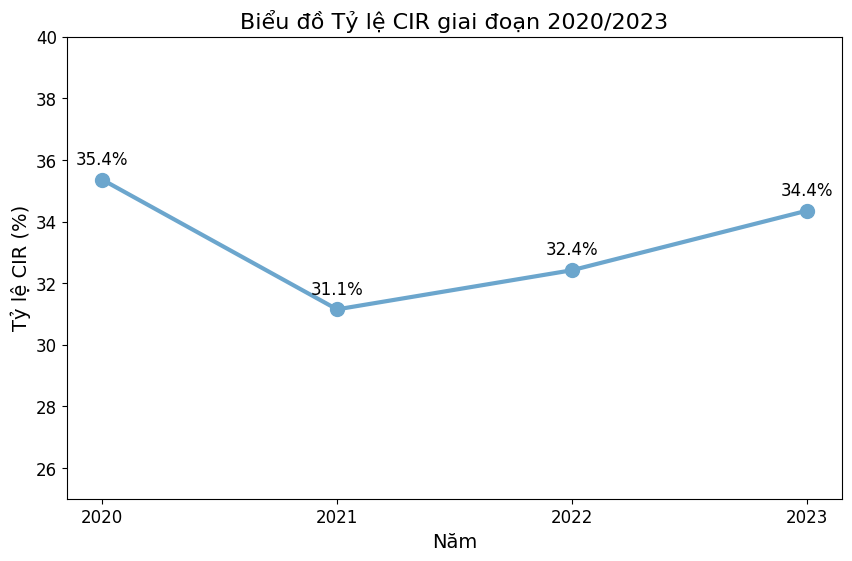

In [77]:
# visulize tỷ lệ CIR
data = {
    'Năm': ['2020', '2021', '2022', '2023'],
    'Tỷ lệ CIR': [35.359652, 31.147559, 32.418341, 34.350858]
}

df = pd.DataFrame(data)
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(df['Năm'], df['Tỷ lệ CIR'], marker='o', linestyle='-', color='#6CA6CD', linewidth=3, markersize=10)

# Đánh dấu giá trị trên các điểm
for i in range(len(df)):
    plt.text(df['Năm'][i], df['Tỷ lệ CIR'][i] + 0.5, f'{df["Tỷ lệ CIR"][i]:.1f}%', ha='center', fontsize=12)

# Thiết lập giới hạn cho trục y
plt.ylim(25, 40)

# Thêm tiêu đề và nhãn cho các trục
plt.title('Biểu đồ Tỷ lệ CIR giai đoạn 2020/2023', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Tỷ lệ CIR (%)', fontsize=14)

# Định dạng trục y để hiển thị theo phần trăm
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()

Cơ cấu nợ xấu & nợ cần chú ý của BID giai đoạn 2022-2024


Dependencies 

In [78]:
single_space = ' '
double_space = f'{single_space}{single_space}'

def clean_text(text):
    return text.strip().replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace(double_space, single_space)

In [79]:
url = f"https://s.cafef.vn/hose/bid-ngan-hang-thuong-mai-co-phan-dau-tu-va-phat-trien-viet-nam.chn"

payload = {}
headers = {
  'Connection': 'keep-alive',
  'Sec-Fetch-Dest': 'document',
  'Sec-Fetch-Mode': 'navigate',
  'Sec-Fetch-Site': 'cross-site',
  'Sec-Fetch-User': '?1',
  'Upgrade-Insecure-Requests': '1',
  'Cookie': 'ASP.NET_SessionId=f5df1mgr5ecxyrga1pd1qhw2'
}

response = requests.request("GET", url, headers=headers, data=payload)

In [80]:
soup = BeautifulSoup(response.text, 'html.parser')

In [81]:
table_wrapper = soup.select_one("#NLoaded")
table_content = table_wrapper.table

In [82]:
header = []
contents = []

In [83]:
header_cols = table_content.find(class_="_header").find_all("td")
for header_cell in header_cols:
    header.append(clean_text(header_cell.text))

In [84]:
rows = table_content.find_all("tr")[1:]
for row in rows:
    cols = row.find_all("td")
    content = []
    for col in cols: 
        content.append(clean_text(col.text))
    contents.append(content)

convert to dataframe 

In [85]:
df = pd.DataFrame(contents, columns=header)
df.head()

,Chỉ tiêu,Quý 2-2023,Quý 3-2023,Quý 4-2023,Quý 1-2024
0,Nợ đủ tiêu chuẩn,"1,567,744,091,000","1,596,323,510,000","1,727,328,174,000","1,730,098,099,000"
1,Nợ cần chú ý,"35,352,442,000","30,734,863,000","28,107,442,000","36,832,273,000"
2,Nợ dưới tiêu chuẩn,"7,729,818,000","4,446,046,000","3,693,267,000","6,345,918,000"
3,Nợ nghi ngờ,"5,277,549,000","9,138,360,000","5,667,202,000","5,374,793,000"
4,Nợ có khả năng mất vốn,"12,962,717,000","12,809,362,000","12,868,797,000","15,279,151,000"


In [86]:
df["Quý 1-2024"] = df["Quý 1-2024"].str.replace(",","").astype(float)
df["Quý 2-2023"] = df["Quý 2-2023"].str.replace(",","").astype(float)
df["Quý 3-2023"] = df["Quý 3-2023"].str.replace(",","").astype(float)
df["Quý 4-2023"] = df["Quý 4-2023"].str.replace(",","").astype(float)

In [87]:
df

,Chỉ tiêu,Quý 2-2023,Quý 3-2023,Quý 4-2023,Quý 1-2024
0,Nợ đủ tiêu chuẩn,1.567744e+12,1.596324e+12,1.727328e+12,1.730098e+12
1,Nợ cần chú ý,3.535244e+10,3.073486e+10,2.810744e+10,3.683227e+10
2,Nợ dưới tiêu chuẩn,7.729818e+09,4.446046e+09,3.693267e+09,6.345918e+09
3,Nợ nghi ngờ,5.277549e+09,9.138360e+09,5.667202e+09,5.374793e+09
4,Nợ có khả năng mất vốn,1.296272e+10,1.280936e+10,1.286880e+10,1.527915e+10


In [88]:
df1 = df.iloc[[1,2,3,4]]
df1

,Chỉ tiêu,Quý 2-2023,Quý 3-2023,Quý 4-2023,Quý 1-2024
1,Nợ cần chú ý,3.535244e+10,3.073486e+10,2.810744e+10,3.683227e+10
2,Nợ dưới tiêu chuẩn,7.729818e+09,4.446046e+09,3.693267e+09,6.345918e+09
3,Nợ nghi ngờ,5.277549e+09,9.138360e+09,5.667202e+09,5.374793e+09
4,Nợ có khả năng mất vốn,1.296272e+10,1.280936e+10,1.286880e+10,1.527915e+10


In [89]:
df1.columns

Index(['Chỉ tiêu', 'Quý 2-2023', 'Quý 3-2023', 'Quý 4-2023', 'Quý 1-2024'], dtype='object')

In [90]:
sum= df.iloc[:, 1:].sum(axis=0)
sum['chỉ tiêu'] = "tổng dư nợ"
sum

Quý 2-2023    1629066617000.0
Quý 3-2023    1653452141000.0
Quý 4-2023    1777664882000.0
Quý 1-2024    1793930234000.0
chỉ tiêu           tổng dư nợ
dtype: object

In [91]:
# tính cơ cấu nợ xấu và & nợ cần chú ý 
debt_cols = ['Quý 2-2023', 'Quý 3-2023', 'Quý 4-2023', 'Quý 1-2024']
S = df1[debt_cols].copy()
su_cols = ['Quý 2-2023', 'Quý 3-2023', 'Quý 4-2023', 'Quý 1-2024']
su = sum[su_cols].copy()
su = su.set_axis(debt_cols)
S = (S/su)*100
S["chỉ tiêu"] = "Nợ cần chú ý", "Nợ dưới tiêu chuẩn", "Nợ nghi ngờ", "Nợ xấu có khả năng mất vốn"
S

,Quý 2-2023,Quý 3-2023,Quý 4-2023,Quý 1-2024,chỉ tiêu
1,2.170104,1.85883,1.581144,2.053161,Nợ cần chú ý
2,0.474494,0.268895,0.207759,0.353744,Nợ dưới tiêu chuẩn
3,0.323962,0.552684,0.3188,0.29961,Nợ nghi ngờ
4,0.795714,0.774704,0.723916,0.851714,Nợ xấu có khả năng mất vốn


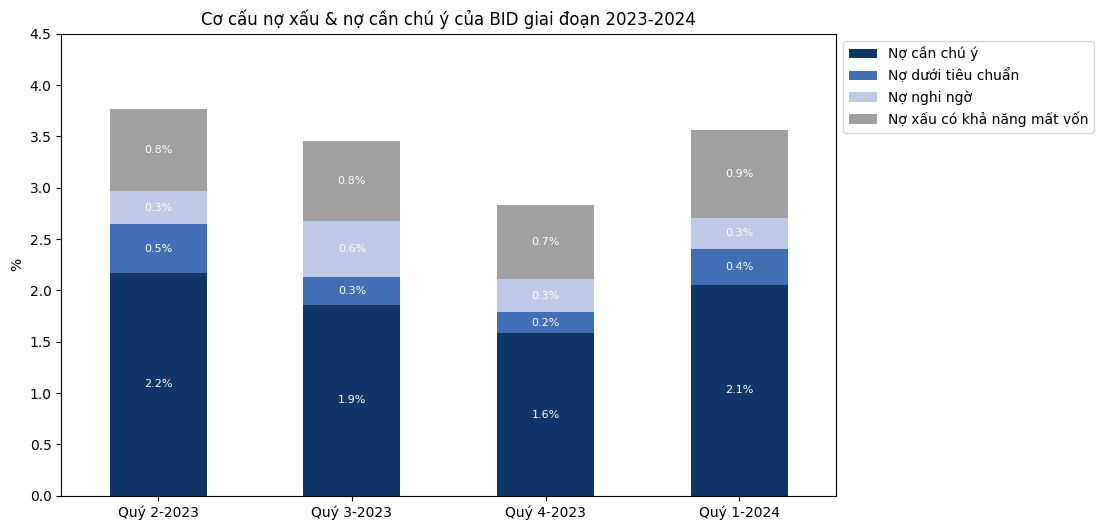

In [92]:
# bar label demo 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(S)

df.set_index('chỉ tiêu', inplace=True)

# df = pd.DataFrame(data, index=categories)
# Vẽ biểu đồ cột chồng (stacked bar chart)
ax = df.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#103667', '#426EB4', '#BFCAE6', '#A0A0A0'])

# Định dạng biểu đồ
ax.set_ylabel('%')
ax.set_xlabel('')
ax.set_ylim(0, 4.5)
ax.set_title('Cơ cấu nợ xấu & nợ cần chú ý của BID giai đoạn 2023-2024')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
# Thêm số liệu phần trăm trên cột
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f%%', fontsize=8, color='white')

plt.show()
